<a href="https://colab.research.google.com/github/saritmaitra/SP_Commodities/blob/master/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
%matplotlib inline
import statsmodels.api as sm

In [2]:
df = (pd.read_csv('export_dataframe.csv',
            parse_dates=['date_time'])
.set_index('date_time'))
df.head()

,open,high,low,close,cum_vol,cum_dollar,cum_ticks,AO,EMA,DEMA,...,CHAIKIN,MFI,VZO,PZO,EFI,CFI,CMO,FISH,VPT,MSD
date_time,,,,,,,,,,,,,,,,,,,,,
2010-01-04 11:44:37.677,9.80,9.90,9.29,9.87,7108399,70000764.02,16313,NaN,9.870000,9.870000,...,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,0.0,6288.524590,NaN
2010-01-04 15:25:41.246,9.87,9.90,9.71,9.75,7135799,70024069.32,17450,NaN,9.803333,9.773704,...,NaN,NaN,-74.895073,-53.267045,-8501.160000,NaN,NaN,0.0,-83197.370147,NaN
2010-01-05 09:49:30.721,9.75,9.88,9.65,9.75,7206642,70042015.74,14163,NaN,9.781475,9.751089,...,NaN,NaN,693.731780,-32.990458,-3923.612308,NaN,NaN,0.0,-83197.370147,NaN
2010-01-05 11:30:56.816,9.75,9.90,9.75,9.79,7115814,70003849.88,16459,NaN,9.784363,9.766180,...,NaN,NaN,6.342522,7.711144,-1540.972913,NaN,NaN,0.0,-53173.370147,NaN
2010-01-05 14:45:47.958,9.79,9.83,9.69,9.71,7172109,70006253.45,19526,NaN,9.762242,9.733927,...,NaN,NaN,-36.318430,-20.228612,-1763.692308,NaN,NaN,0.0,-85437.370147,NaN


In [4]:
#df.drop(['Unnamed: 0'], axis=1, inplace=True)
#df.head()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15297 entries, 2010-01-04 11:44:37.677000 to 2019-06-14 16:00:00.560305
Data columns (total 33 columns):
open          15297 non-null float64
high          15297 non-null float64
low           15297 non-null float64
close         15297 non-null float64
cum_vol       15297 non-null int64
cum_dollar    15297 non-null float64
cum_ticks     15297 non-null int64
AO            15264 non-null float64
EMA           15297 non-null float64
DEMA          15297 non-null float64
TEMA          15297 non-null float64
TRIX          15296 non-null float64
TRIMA         15263 non-null float64
VAMA          15282 non-null float64
ER            15287 non-null float64
KAMA          15277 non-null float64
ZLEMA         15285 non-null float64
HMA           15294 non-null float64
EVWMA         15297 non-null float64
TR            15297 non-null float64
ATR           15284 non-null float64
SAR           15297 non-null float64
UO            15270 non-null flo

In [8]:
df.isnull().sum() # missing values
#df.dropna(inplace=True)

open          0
high          0
low           0
close         0
cum_vol       0
cum_dollar    0
cum_ticks     0
AO            0
EMA           0
DEMA          0
TEMA          0
TRIX          0
TRIMA         0
VAMA          0
ER            0
KAMA          0
ZLEMA         0
HMA           0
EVWMA         0
TR            0
ATR           0
SAR           0
UO            0
CHAIKIN       0
MFI           0
VZO           0
PZO           0
EFI           0
CFI           0
CMO           0
FISH          0
VPT           0
MSD           0
dtype: int64

In [19]:
# Taking care of missing data
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values = 'NaN', strategy = 'mean')
#imputer = imputer.fit(df)
#df[:, 1:3] = imputer.transform(df[:, 1:3])
#df.isnull().sum()

### Feature Scaling before ML
Most mathematical models are based on Euclidian Distances which means that the square distances can be overwhelming different from variable to variable making the model behave weirdly. Feature Scaling is the process that puts all the values in the same “range” of greatness so it doesn’t happen that one variable will end up dominating the other when it shouldn’t happen.

In [20]:
# Splitting the dataset into the Training set and Test set
#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X_train = sc_X.fit_transform(X_train) #Fit and transform
#X_test = sc_X.transform(X_test) #Only trasform
#sc_y = StandardScaler()
#y_train = sc_y.fit_transform(y_train)

In [21]:
DATA = df.fillna(method ='pad') # filling the missing values with previous ones 
DATA.isnull().sum()

open          0
high          0
low           0
close         0
cum_vol       0
cum_dollar    0
cum_ticks     0
AO            0
EMA           0
DEMA          0
TEMA          0
TRIX          0
TRIMA         0
VAMA          0
ER            0
KAMA          0
ZLEMA         0
HMA           0
EVWMA         0
TR            0
ATR           0
SAR           0
UO            0
CHAIKIN       0
MFI           0
VZO           0
PZO           0
EFI           0
CFI           0
CMO           0
FISH          0
VPT           0
MSD           0
dtype: int64

In [22]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15246 entries, 2010-01-19 14:58:59.093000 to 2019-06-14 15:59:08.122324
Data columns (total 33 columns):
open          15246 non-null float64
high          15246 non-null float64
low           15246 non-null float64
close         15246 non-null float64
cum_vol       15246 non-null int64
cum_dollar    15246 non-null float64
cum_ticks     15246 non-null int64
AO            15246 non-null float64
EMA           15246 non-null float64
DEMA          15246 non-null float64
TEMA          15246 non-null float64
TRIX          15246 non-null float64
TRIMA         15246 non-null float64
VAMA          15246 non-null float64
ER            15246 non-null float64
KAMA          15246 non-null float64
ZLEMA         15246 non-null float64
HMA           15246 non-null float64
EVWMA         15246 non-null float64
TR            15246 non-null float64
ATR           15246 non-null float64
SAR           15246 non-null float64
UO            15246 non-null flo

In [24]:
DATA.head()

,open,high,low,close,cum_vol,cum_dollar,cum_ticks,AO,EMA,DEMA,...,CHAIKIN,MFI,VZO,PZO,EFI,CFI,CMO,FISH,VPT,MSD
date_time,,,,,,,,,,,,,,,,,,,,,
2010-01-19 14:58:59.093,9.08,9.10,8.84,9.04,7737601,70000162.62,17369,-0.227647,9.006818,9.020411,...,-106254.973882,9.764891,19728.893438,12.313258,-8032.734692,-269876.828559,-6.422018,-0.104943,-1.881716e+06,0.173613
2010-01-20 09:46:50.846,9.04,9.13,8.90,8.92,7771539,70058422.35,15602,-0.192412,8.989449,8.986428,...,-126132.723161,-79.104219,-407.331691,-2.620514,-8781.892253,-278498.930519,-1.923077,-0.136973,-1.996960e+06,0.165647
2010-01-20 11:07:25.531,8.92,8.96,8.76,8.77,7881981,70003148.06,17777,-0.174794,8.945548,8.908013,...,-140415.474869,48.823586,-289.088550,-15.384111,-8790.390702,-287160.888442,-28.301887,-0.479741,-2.085371e+06,0.164457
2010-01-20 15:08:51.352,8.77,9.01,8.76,8.80,7940922,70000121.37,19609,-0.153147,8.916432,8.863114,...,-111640.496961,-79.255308,-1001.167334,-0.181320,-7899.609286,-294715.595613,-9.890110,-0.831822,-2.105977e+06,0.164457
2010-01-21 09:45:13.953,8.80,9.10,8.77,8.95,7855065,70000068.27,15473,-0.167882,8.923147,8.885866,...,-89270.140670,-28.068369,-1160.025577,13.234378,-6878.017091,-301035.917457,-11.111111,-0.968351,-2.110637e+06,0.161627


In [25]:
#DATA.index.name = 'Date'
DATA.head()

,open,high,low,close,cum_vol,cum_dollar,cum_ticks,AO,EMA,DEMA,...,CHAIKIN,MFI,VZO,PZO,EFI,CFI,CMO,FISH,VPT,MSD
date_time,,,,,,,,,,,,,,,,,,,,,
2010-01-19 14:58:59.093,9.08,9.10,8.84,9.04,7737601,70000162.62,17369,-0.227647,9.006818,9.020411,...,-106254.973882,9.764891,19728.893438,12.313258,-8032.734692,-269876.828559,-6.422018,-0.104943,-1.881716e+06,0.173613
2010-01-20 09:46:50.846,9.04,9.13,8.90,8.92,7771539,70058422.35,15602,-0.192412,8.989449,8.986428,...,-126132.723161,-79.104219,-407.331691,-2.620514,-8781.892253,-278498.930519,-1.923077,-0.136973,-1.996960e+06,0.165647
2010-01-20 11:07:25.531,8.92,8.96,8.76,8.77,7881981,70003148.06,17777,-0.174794,8.945548,8.908013,...,-140415.474869,48.823586,-289.088550,-15.384111,-8790.390702,-287160.888442,-28.301887,-0.479741,-2.085371e+06,0.164457
2010-01-20 15:08:51.352,8.77,9.01,8.76,8.80,7940922,70000121.37,19609,-0.153147,8.916432,8.863114,...,-111640.496961,-79.255308,-1001.167334,-0.181320,-7899.609286,-294715.595613,-9.890110,-0.831822,-2.105977e+06,0.164457
2010-01-21 09:45:13.953,8.80,9.10,8.77,8.95,7855065,70000068.27,15473,-0.167882,8.923147,8.885866,...,-89270.140670,-28.068369,-1160.025577,13.234378,-6878.017091,-301035.917457,-11.111111,-0.968351,-2.110637e+06,0.161627


In [26]:
DATA.describe() # overall statistics

,open,high,low,close,cum_vol,cum_dollar,cum_ticks,AO,EMA,DEMA,...,CHAIKIN,MFI,VZO,PZO,EFI,CFI,CMO,FISH,VPT,MSD
count,15246.000000,15246.000000,15246.000000,15246.000000,1.524600e+04,1.524600e+04,15246.000000,15246.000000,15246.000000,15246.000000,...,1.524600e+04,1.524600e+04,1.524600e+04,15246.000000,15246.000000,1.524600e+04,15246.000000,15246.000000,1.524600e+04,15246.000000
mean,17.703014,17.817961,17.583558,17.704411,5.810128e+06,7.074797e+07,11903.222747,0.020410,17.698775,17.704420,...,-7.629280e+04,1.462846e+03,-3.210127e+02,2.089369,-6647.313953,-7.601313e+07,2.625617,0.120741,-6.057626e+08,0.250898
std,8.543410,8.554934,8.527692,8.543741,5.043019e+06,1.209163e+07,7427.360776,0.434966,8.539489,8.544778,...,6.029628e+05,1.780358e+05,2.571017e+04,27.820737,21213.501778,2.791507e+07,43.946031,1.933652,2.344807e+08,0.143045
min,1.620000,1.780000,1.610000,1.620000,2.050512e+06,7.000000e+07,2.000000,-4.094559,1.829038,1.712111,...,-3.228359e+07,-3.817018e+06,-1.646487e+06,-80.053150,-435048.969311,-1.041445e+08,-100.000000,-7.407998,-8.043080e+08,0.040906
25%,11.230000,11.320000,11.122500,11.230000,2.760102e+06,7.000210e+07,7078.000000,-0.260456,11.226280,11.227088,...,-7.312778e+04,-2.903128e+01,-1.965953e+02,-17.835040,-6529.604793,-9.338183e+07,-29.629630,-1.257698,-7.516675e+08,0.159971
50%,16.740000,16.860000,16.630000,16.745000,4.208078e+06,7.001043e+07,9588.000000,0.032485,16.737298,16.717682,...,-2.172759e+04,5.691366e+01,6.218688e+01,1.769650,-2282.691354,-8.631897e+07,2.307829,0.144946,-7.152106e+08,0.221512
75%,25.550000,25.680000,25.400000,25.550000,6.300075e+06,7.005000e+07,14447.000000,0.312044,25.568858,25.533045,...,-4.569832e+03,1.310691e+02,2.676525e+02,21.864826,-674.668503,-7.315884e+07,34.545455,1.506332,-5.924691e+08,0.306323
max,34.250000,34.300000,34.070000,34.250000,9.808082e+07,1.323113e+09,71444.000000,1.824735,34.082328,34.235703,...,1.020024e+07,2.140484e+07,6.540245e+05,86.835597,286441.707643,-2.698768e+05,100.000000,8.600284,-8.110189e+05,2.607515


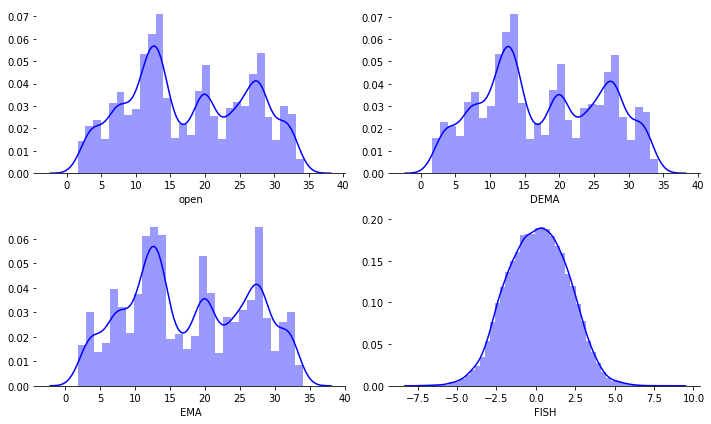

In [27]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(10, 6))
sns.despine(left=True)

# Plot a simple histogram with binsize determined automatically
sns.distplot(DATA.open, color="b", ax=axes[0, 0])

sns.distplot(DATA.DEMA, color="b", ax=axes[0, 1])

sns.distplot(DATA.EMA, color="b",ax=axes[1, 0])

sns.distplot(DATA.FISH, color="b", ax=axes[1, 1])

#plt.setp(axes, yticks=[])
plt.tight_layout()

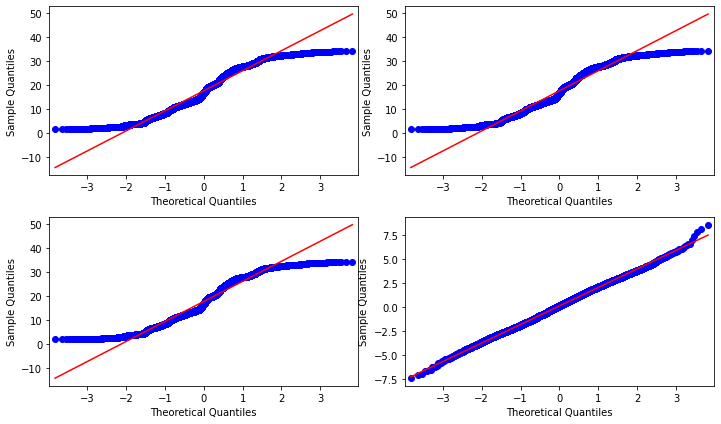

In [28]:
from statsmodels.graphics.gofplots import qqplot

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot a simple histogram with binsize determined automatically
qqplot(DATA.open, line= 'r', ax=axes[0, 0], label='Open')

qqplot(DATA.DEMA, line= 'r',label='Close', ax=axes[0, 1])

qqplot(DATA.EMA, line= 'r',label='cum_vol',ax=axes[1, 0])

qqplot(DATA.FISH, line= 'r',label='cum_dollar', ax=axes[1, 1])

#plt.setp(axes, yticks=[])
plt.tight_layout()

/Users/yiluntong/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/yiluntong/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/yiluntong/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/yiluntong/anaconda3/li

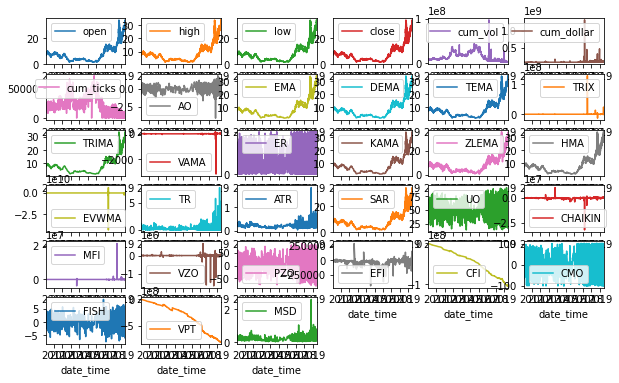

In [31]:
DATA.plot(subplots=True, layout=(6, 6), figsize=(10, 6), sharex=False);

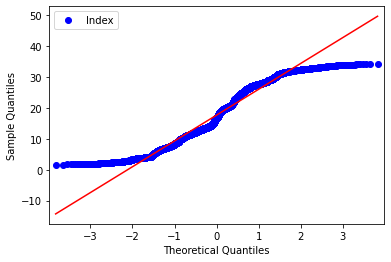

In [30]:
##exolore 'fish', 'vzo', 'MFI', 'EMA', 'EFI', CMO, CHAIKIN 

from statsmodels.graphics.gofplots import qqplot

qqplot(DATA.close, line= 'r',label='Index')
plt.legend(loc='best')


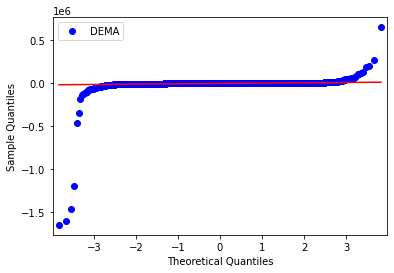

In [35]:
qqplot(DATA.VZO, line='r', label='VZO')
plt.legend(loc='best')


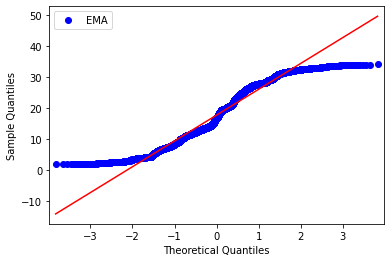

In [33]:
qqplot(DATA.EMA, line='r', label='EMA')
plt.legend(loc='best')


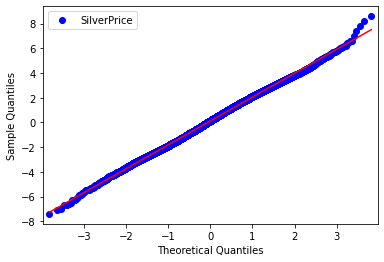

In [34]:
qqplot(DATA.FISH, line='r', label='SilverPrice')
plt.legend(loc='best')


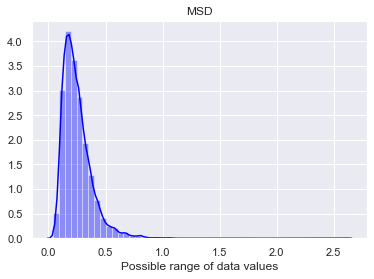

Skewness: 4.396632
************************************************************
Kurtosis: 50.965217
************************************************************


In [38]:
sns.set()
sns.distplot(DATA.MSD, color='blue') #density plot
plt.title("MSD")
plt.xlabel('Possible range of data values')
plt.show()
print('Skewness: %f' % DATA.MSD.skew())
print('*'*60)
print('Kurtosis: %f' % DATA.MSD.kurt())
print('*'*60)

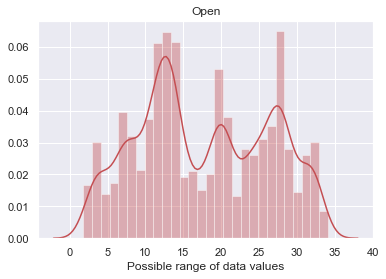

Skewness: 0.093163
************************************************************
Kurtosis: -1.149249
************************************************************


In [39]:
sns.distplot(DATA.EMA, color='r') #density plot
plt.title("Open")
plt.xlabel('Possible range of data values')
plt.show()
print('Skewness: %f' % DATA.EMA.skew())
print('*'*60)
print('Kurtosis: %f' % DATA.EMA.kurt())
print('*'*60)

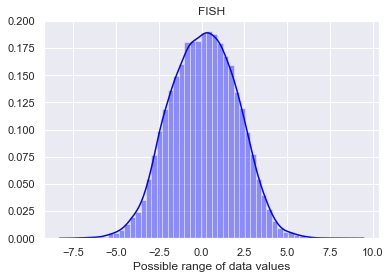

Skewness: -0.025177
************************************************************
Kurtosis: -0.176560
************************************************************


In [40]:
sns.distplot(DATA.FISH, color='blue') #density plot
plt.title("FISH")
plt.xlabel('Possible range of data values')
plt.show()
print('Skewness: %f' % DATA.FISH.skew())
print('*'*60)
print('Kurtosis: %f' % DATA.FISH.kurt())
print('*'*60)

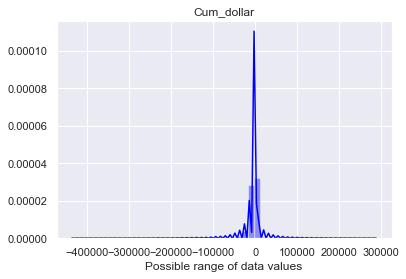

Skewness: -5.318580
************************************************************
Kurtosis: 70.009485
************************************************************


In [41]:
sns.distplot(DATA.EFI, color='blue') #density plot
plt.title("Cum_dollar")
plt.xlabel('Possible range of data values')
plt.show()
print('Skewness: %f' % DATA.EFI.skew())
print('*'*60)
print('Kurtosis: %f' % DATA.EFI.kurt())
print('*'*60)

In [42]:
DATA.skew(axis = 0) 

open            0.092851
high            0.092384
low             0.093531
close           0.092632
cum_vol         3.224170
cum_dollar     78.811449
cum_ticks       2.150834
AO             -0.493897
EMA             0.093163
DEMA            0.092736
TEMA            0.092697
TRIX          114.080140
TRIMA           0.095706
VAMA         -100.593656
ER              0.586879
KAMA            0.095001
ZLEMA           0.093386
HMA             0.092986
EVWMA         -92.959999
TR             10.260296
ATR             4.244030
SAR             0.097412
UO              0.014760
CHAIKIN       -28.645963
MFI           113.503638
VZO           -50.875163
PZO             0.041940
EFI            -5.318580
CFI             1.520250
CMO             0.010537
FISH           -0.025177
VPT             1.492611
MSD             4.396632
dtype: float64

In [43]:
from scipy.stats import kurtosis
kurtosis(DATA)

array([-1.14824281e+00, -1.14910896e+00, -1.14698029e+00, -1.14834093e+00,
        1.72567953e+01,  7.70809019e+03,  6.97944698e+00,  3.65713363e+00,
       -1.14926610e+00, -1.14784619e+00, -1.14813401e+00,  1.36144555e+04,
       -1.14928777e+00,  1.15519544e+04, -4.95830752e-01, -1.14654994e+00,
       -1.13558678e+00, -1.14846063e+00,  1.06482132e+04,  2.02194224e+02,
        4.50248974e+01, -1.14009399e+00, -4.82783503e-01,  1.35870149e+03,
        1.37150789e+04,  3.10353255e+03, -4.01439195e-01,  6.99861335e+01,
        1.20930758e+00, -6.58573850e-01, -1.76895757e-01,  8.48878700e-01,
        5.09481107e+01])

In [44]:
from scipy import stats
stats.jarque_bera(DATA.EMA)

(861.0960417968619, 0.0)

In [45]:
stats.jarque_bera(DATA.FISH)

(21.488667650990184, 2.1567266651700834e-05)

In [46]:
stats.jarque_bera(DATA.MSD)

(1698033.5712450494, 0.0)

In [48]:
stats.jarque_bera(DATA.VZO)

(6125249071.180416, 0.0)

In [49]:
from scipy import stats
stats.kstest(DATA.close, 'norm')


KstestResult(statistic=0.9849206813282206, pvalue=0.0)

In [50]:
stats.kstest(DATA.open, 'norm')

KstestResult(statistic=0.9849206813282206, pvalue=0.0)

In [51]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(DATA)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.166, p=0.000
Sample does not look Gaussian (reject H0)


/Users/yiluntong/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [52]:
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

corr= DATA.corr(method='pearson') # correlation (pearson)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,open,high,low,close,cum_vol,cum_dollar,cum_ticks,AO,EMA,DEMA,TEMA,TRIX,TRIMA,VAMA,ER,KAMA,ZLEMA,HMA,EVWMA,TR,ATR,SAR,UO,CHAIKIN,MFI,VZO,PZO,EFI,CFI,CMO,FISH,VPT,MSD
open,1,1,1,1,-0.75,0.00089,-0.76,0.056,1,1,1,-0.0018,1,0.31,-0.0047,1,1,1,-0.006,0.12,0.29,1,0.086,0.12,0.00096,-0.00017,0.036,0.34,-0.73,0.03,0.042,-0.75,0.19
high,1,1,1,1,-0.75,0.00071,-0.76,0.055,1,1,1,-0.0019,1,0.31,-0.0041,1,1,1,-0.0059,0.13,0.29,1,0.086,0.12,0.00092,-0.00013,0.037,0.34,-0.73,0.031,0.042,-0.75,0.19
low,1,1,1,1,-0.75,0.0012,-0.76,0.057,1,1,1,-0.0018,1,0.31,-0.0051,1,1,1,-0.0061,0.11,0.28,1,0.086,0.12,0.00096,-0.0002,0.038,0.34,-0.73,0.032,0.043,-0.75,0.19
close,1,1,1,1,-0.75,0.00097,-0.76,0.057,1,1,1,-0.002,1,0.31,-0.0046,1,1,1,-0.006,0.12,0.29,1,0.091,0.12,0.00094,-3.6e-05,0.042,0.34,-0.73,0.035,0.044,-0.75,0.19
cum_vol,-0.75,-0.75,-0.75,-0.75,1,0.16,0.86,-0.065,-0.75,-0.75,-0.75,-0.0022,-0.74,-0.23,0.0029,-0.74,-0.74,-0.75,0.00034,-0.097,-0.23,-0.74,-0.094,-0.27,-0.0062,0.0046,-0.029,-0.56,0.67,-0.044,-0.056,0.7,-0.14
cum_dollar,0.00089,0.00071,0.0012,0.00097,0.16,1,-0.052,-0.011,0.00097,0.00085,0.00089,-0.00025,0.0015,0.0013,-0.0047,0.0011,0.00073,0.00087,-0.0037,-0.019,-0.027,0.0013,-0.013,-0.42,-0.00096,0.001,-0.0087,-0.074,-0.013,-0.013,-0.012,-0.014,-0.022
cum_ticks,-0.76,-0.76,-0.76,-0.76,0.86,-0.052,1,-0.11,-0.75,-0.76,-0.76,-0.0019,-0.75,-0.23,-0.033,-0.75,-0.76,-0.76,0.012,-0.13,-0.16,-0.75,-0.14,-0.15,0.0019,0.00028,-0.084,-0.46,0.72,-0.091,-0.1,0.74,-0.1
AO,0.056,0.055,0.057,0.057,-0.065,-0.011,-0.11,1,0.045,0.06,0.06,0.0034,-0.0018,0.018,0.058,0.043,0.1,0.054,-0.00075,-0.084,-0.16,0.024,0.61,0.061,-0.00095,-0.0067,0.52,0.052,-0.048,0.57,0.75,-0.041,-0.11
EMA,1,1,1,1,-0.75,0.00097,-0.75,0.045,1,1,1,-0.0019,1,0.31,-0.0056,1,1,1,-0.006,0.12,0.29,1,0.074,0.12,0.0011,-0.00038,0.025,0.34,-0.73,0.017,0.029,-0.75,0.19
DEMA,1,1,1,1,-0.75,0.00085,-0.76,0.06,1,1,1,-0.0019,1,0.31,-0.0046,1,1,1,-0.006,0.12,0.29,1,0.087,0.12,0.0011,-0.00029,0.037,0.34,-0.73,0.03,0.044,-0.75,0.19


In [53]:
corr= DATA.corr(method='spearman') # coorelation (spearman)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,open,high,low,close,cum_vol,cum_dollar,cum_ticks,AO,EMA,DEMA,TEMA,TRIX,TRIMA,VAMA,ER,KAMA,ZLEMA,HMA,EVWMA,TR,ATR,SAR,UO,CHAIKIN,MFI,VZO,PZO,EFI,CFI,CMO,FISH,VPT,MSD
open,1,1,1,1,-1,0.17,-0.85,0.066,1,1,1,0.06,1,0.99,-0.0034,1,1,1,0.21,0.21,0.35,1,0.086,0.51,0.012,-0.0059,0.041,0.59,-0.84,0.033,0.046,-0.85,0.22
high,1,1,1,1,-1,0.18,-0.86,0.065,1,1,1,0.059,1,0.99,-0.0029,1,1,1,0.21,0.22,0.35,1,0.085,0.51,0.012,-0.0052,0.043,0.59,-0.84,0.034,0.045,-0.85,0.22
low,1,1,1,1,-1,0.17,-0.85,0.067,1,1,1,0.06,1,0.99,-0.0039,1,1,1,0.22,0.2,0.34,1,0.086,0.51,0.013,-0.0045,0.044,0.59,-0.84,0.035,0.047,-0.85,0.22
close,1,1,1,1,-1,0.18,-0.86,0.067,1,1,1,0.06,1,0.99,-0.0036,1,1,1,0.21,0.21,0.35,1,0.091,0.51,0.014,-0.0026,0.048,0.59,-0.84,0.039,0.047,-0.85,0.22
cum_vol,-1,-1,-1,-1,1,-0.15,0.84,-0.067,-1,-1,-1,-0.06,-0.99,-0.99,0.0028,-1,-0.99,-1,-0.22,-0.22,-0.35,-0.99,-0.088,-0.51,-0.014,0.0045,-0.043,-0.59,0.84,-0.035,-0.046,0.84,-0.23
cum_dollar,0.17,0.18,0.17,0.18,-0.15,1,-0.24,0.025,0.17,0.18,0.18,0.021,0.17,0.17,-0.0033,0.17,0.18,0.17,0.04,-0.011,-0.0045,0.17,0.025,0.086,-0.00069,0.0063,0.026,0.12,-0.16,0.024,0.027,-0.16,-0.013
cum_ticks,-0.85,-0.86,-0.85,-0.86,0.84,-0.24,1,-0.11,-0.85,-0.85,-0.86,-0.076,-0.85,-0.85,-0.026,-0.85,-0.86,-0.85,-0.19,-0.25,-0.23,-0.85,-0.13,-0.45,-0.037,-0.023,-0.1,-0.5,0.74,-0.092,-0.092,0.74,-0.14
AO,0.066,0.065,0.067,0.067,-0.067,0.025,-0.11,1,0.055,0.07,0.07,0.47,0.0035,0.048,0.06,0.051,0.11,0.064,-0.0069,-0.079,-0.1,0.03,0.63,0.2,0.31,0.18,0.54,0.04,-0.033,0.59,0.77,-0.029,0.025
EMA,1,1,1,1,-1,0.17,-0.85,0.055,1,1,1,0.057,1,0.99,-0.0042,1,1,1,0.21,0.21,0.35,1,0.072,0.5,0.007,-0.0099,0.029,0.59,-0.84,0.018,0.031,-0.85,0.22
DEMA,1,1,1,1,-1,0.18,-0.85,0.07,1,1,1,0.062,1,0.99,-0.0033,1,1,1,0.21,0.21,0.35,1,0.087,0.51,0.013,-0.0054,0.042,0.59,-0.84,0.033,0.047,-0.85,0.22


In [54]:
from statsmodels.tsa.stattools import acf, ccf


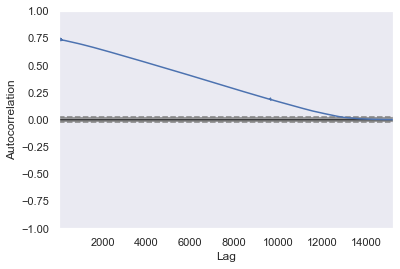

In [55]:
pd.plotting.autocorrelation_plot(DATA)

/Users/yiluntong/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


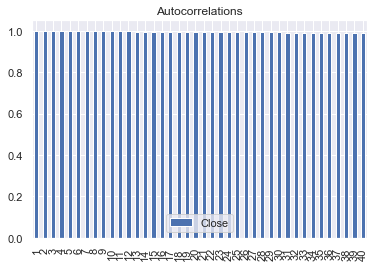

In [56]:
acf = pd.DataFrame(sm.tsa.stattools.acf(DATA.close), columns=['Close'])
fig = acf[1:].plot(kind='bar', title='Autocorrelations')

/Users/yiluntong/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


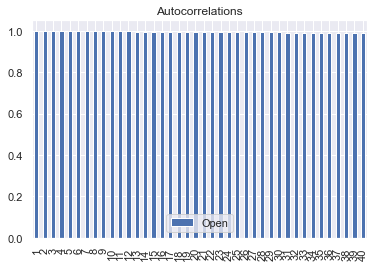

In [57]:
acf = pd.DataFrame(sm.tsa.stattools.acf(DATA.open), columns=['Open'])
fig = acf[1:].plot(kind='bar', title='Autocorrelations')

In [58]:
K=12
# compute CCF
ccf = 1/len(DATA.close) * np.correlate(DATA.close, DATA.cum_vol)
kappa = np.arange(-(K-1), 2*K)

# print mean values of signals
print('Mean of signal DATA.close: %f' %np.mean(DATA.close))
print('Mean of signal DATA.cum_vol: %f' %np.mean(DATA.cum_vol))



Mean of signal DATA.close: 17.704411
Mean of signal DATA.cum_vol: 5810127.913092


In [59]:
# covariance matrix
mean_vec = np.mean(DATA, axis=0)
cov_mat = (DATA - mean_vec).T.dot((DATA - mean_vec)) / (DATA.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
                    open          high           low         close  \
open        7.298985e+01  7.307773e+01  7.284105e+01  7.298196e+01   
high        7.307773e+01  7.318689e+01  7.292858e+01  7.307920e+01   
low         7.284105e+01  7.292858e+01  7.272154e+01  7.284281e+01   
close       7.298196e+01  7.307920e+01  7.284281e+01  7.299551e+01   
cum_vol    -3.211304e+07 -3.215754e+07 -3.204604e+07 -3.211532e+07   
cum_dollar  9.243874e+04  7.372420e+04  1.261589e+05  9.984854e+04   
cum_ticks  -4.794534e+04 -4.804467e+04 -4.782555e+04 -4.797338e+04   
AO          2.093803e-01  2.034849e-01  2.117461e-01  2.117538e-01   
EMA         7.294322e+01  7.303664e+01  7.279702e+01  7.293920e+01   
DEMA        7.299698e+01  7.308874e+01  7.285193e+01  7.299674e+01   
TEMA        7.299336e+01  7.308539e+01  7.284930e+01  7.299600e+01   
TRIX       -1.661288e+04 -1.711691e+04 -1.686486e+04 -1.804181e+04   
TRIMA       7.275973e+01  7.285868e+01  7.261220e+01  7.275085e+01   
V

## Augmented Dickey Fuller test

In [60]:
from arch.unitroot import ADF
adf = ADF(DATA.VZO)
print('Close', adf.summary().as_text())
print('*'*60)

adf = ADF(DATA.FISH)
print('Open', adf.summary().as_text())
print('*'*60)

adf = ADF(DATA.MSD)
print('Cum_vol', adf.summary().as_text())
print('*'*60)

adf = ADF(DATA.EFI)
print('Cum_dollar', adf.summary().as_text())

Close    Augmented Dickey-Fuller Results   
Test Statistic               -123.518
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
************************************************************
Open    Augmented Dickey-Fuller Results   
Test Statistic                -20.496
P-value                         0.000
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
************************************************************
Cum_vol    Augmented Dickey-Fuller Results   
Test Statistic                -16.024
P-value                         0.000
Lags   

### Dickey-Fuller GLS Testing
The Dickey-Fuller GLS test is an improved version of the ADF which uses a GLS-detrending regression before running an ADF regression with no additional deterministic terms. 
dfgls performs a modiﬁed Dickey–Fuller t test for a unit root in which the series has been transformed by a generalized least-squares regression.


In [62]:
from arch.unitroot import DFGLS
dfgls = DFGLS(DATA.close)
print('Close', dfgls.summary().as_text())
print('*'*60)

dfgls = DFGLS(DATA.FISH)
print('Open', dfgls.summary().as_text())
print('*'*60)

dfgls = DFGLS(DATA.MSD)
print('Cum_vol', dfgls.summary().as_text())
print('*'*60)

dfgls = DFGLS(DATA.EFI)
print('Cum_dollar', dfgls.summary().as_text())


Close       Dickey-Fuller GLS Results      
Test Statistic                  0.254
P-value                         0.774
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.95 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
************************************************************
Open       Dickey-Fuller GLS Results      
Test Statistic                -20.154
P-value                         0.000
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.95 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
************************************************************
Cum_vol       Dickey-Fuller GLS Results      
Test Statistic                 -9.806
P-value                         0.000
Lags   

## Kwiatkowski–Phillips–Schmidt–Shin (KPSS)

In [63]:
from arch.unitroot import KPSS
kpss = KPSS(DATA.close)
print(kpss.summary().as_text())
print('*'*60)


kpss = KPSS(DATA.FISH)
print(kpss.summary().as_text())
print('*'*60)

kpss = KPSS(DATA.MSD)
print(kpss.summary().as_text())
print('*'*60)

from arch.unitroot import KPSS
kpss = KPSS(DATA.EFI)
print(kpss.summary().as_text())
print('*'*60)

    KPSS Stationarity Test Results   
Test Statistic                 15.465
P-value                         0.000
Lags                               74
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
************************************************************
    KPSS Stationarity Test Results   
Test Statistic                  0.065
P-value                         0.781
Lags                               64
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
************************************************************
    KPSS Stationarity Test Results   
Test Statistic                  3.677
P-value                         0.000
Lags                            

## Variance ratio test
The variance ratio compares the variance of a 1-period return to that of a multi-period return. The comparison length has to be set when initializing the test.

This example compares 1-month to 12-month returns, and the null that the series is a pure random walk is rejected. Negative values indicate some positive autocorrelation in the returns (momentum).

In [64]:
from arch.unitroot import VarianceRatio
vr = VarianceRatio(DATA.close, 12)
print('Close', vr.summary().as_text())
print('*'*60)

vr = VarianceRatio(DATA.VZO, 12)
print('Open', vr.summary().as_text())
print('*'*60)

vr = VarianceRatio(DATA.FISH, 12)
print('Cum_vol', vr.summary().as_text())
print('*'*60)

vr = VarianceRatio(DATA.EFI, 12)
print('Cum_dollar', vr.summary().as_text())
print('*'*60)

Close      Variance-Ratio Test Results     
Test Statistic                  1.752
P-value                         0.080
Lags                               12
-------------------------------------

Computed with overlapping blocks (de-biased)
************************************************************
Open      Variance-Ratio Test Results     
Test Statistic                 -2.211
P-value                         0.027
Lags                               12
-------------------------------------

Computed with overlapping blocks (de-biased)
************************************************************
Cum_vol      Variance-Ratio Test Results     
Test Statistic                 52.938
P-value                         0.000
Lags                               12
-------------------------------------

Computed with overlapping blocks (de-biased)
************************************************************
Cum_dollar      Variance-Ratio Test Results     
Test Statistic                 -4.749
P-v

By default the VR test uses all overlapping blocks to estimate the variance of the long period’s return. 

In [66]:
DATA_diff = DATA-DATA.shift().fillna(0) # differencing
DATA_log = np.log(DATA).diff().fillna(0) # log transform

/Users/yiluntong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/yiluntong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [67]:
from arch.unitroot import ADF
adf = ADF(DATA_diff.close)
print('Close (Diff)', adf.summary().as_text())
print('*'*60)

adf = ADF(DATA_diff.VZO)
print('Open (Diff)', adf.summary().as_text())
print('*'*60)

adf = ADF(DATA_diff.FISH)
print('Cum_vol (Diff)', adf.summary().as_text())
print('*'*60)

adf = ADF(DATA_diff.EFI)
print('Cum_dollar (Diff)', adf.summary().as_text())

Close (Diff)    Augmented Dickey-Fuller Results   
Test Statistic                -90.813
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
************************************************************
Open (Diff)    Augmented Dickey-Fuller Results   
Test Statistic                -32.323
P-value                         0.000
Lags                               43
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
************************************************************
Cum_vol (Diff)    Augmented Dickey-Fuller Results   
Test Statistic                -27.136
P-value                 

In [68]:
from arch.unitroot import KPSS
kpss = KPSS(DATA_diff.close)
print(kpss.summary().as_text())
print('*'*60)


kpss = KPSS(DATA_diff.open)
print(kpss.summary().as_text())
print('*'*60)

kpss = KPSS(DATA_diff.cum_vol)
print(kpss.summary().as_text())
print('*'*60)

#from arch.unitroot import KPSS
#kpss = KPSS(DATA_diff.cum_dollar)
#print(kpss.summary().as_text())
#print('*'*60)

    KPSS Stationarity Test Results   
Test Statistic                  0.068
P-value                         0.764
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
************************************************************
    KPSS Stationarity Test Results   
Test Statistic                  0.067
P-value                         0.768
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
************************************************************
    KPSS Stationarity Test Results   
Test Statistic                  0.061
P-value                         0.809
Lags                            

In [69]:
from arch.unitroot import DFGLS
dfgls = DFGLS(DATA_diff.close)
print('Close', dfgls.summary().as_text())
print('*'*60)

dfgls = DFGLS(DATA_diff.VZO)
print('Open', dfgls.summary().as_text())
print('*'*60)

dfgls = DFGLS(DATA_diff.FISH)
print('Cum_vol', dfgls.summary().as_text())
print('*'*60)

dfgls = DFGLS(DATA_diff.EFI)
print('Cum_dollar', dfgls.summary().as_text())

Close       Dickey-Fuller GLS Results      
Test Statistic                 -0.069
P-value                         0.669
Lags                               43
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.95 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
************************************************************
Open       Dickey-Fuller GLS Results      
Test Statistic                 -0.475
P-value                         0.510
Lags                               43
-------------------------------------

Trend: Constant
Critical Values: -2.57 (1%), -1.95 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
************************************************************
Cum_vol       Dickey-Fuller GLS Results      
Test Statistic                -12.762
P-value                         0.000
Lags   

/Users/yiluntong/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/yiluntong/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/yiluntong/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/yiluntong/anaconda3/li

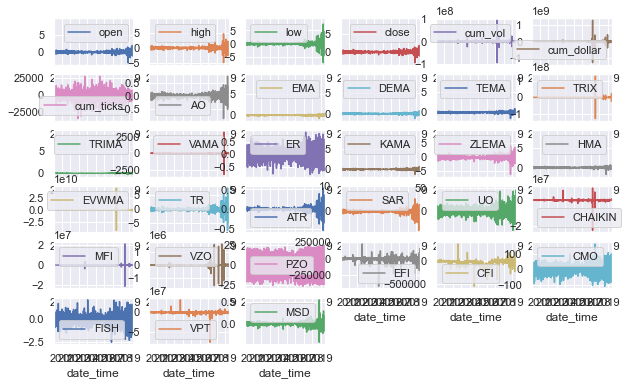

In [70]:
DATA_diff.plot(subplots=True, layout=(6, 6), figsize=(10, 6), sharex=False);

In [71]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import matplotlib.pyplot as plt
from numpy import cumsum, log, polyfit, sqrt, std, subtract
from datetime import datetime
import time



In [72]:
from numpy import cumsum, log, polyfit, sqrt, std, subtract
import seaborn as sns
sns.set();

stock_close = DATA[['close']].copy()
lag1, lag2  = 2,20
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(stock_close[lag:], stock_close[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2

stock_open = DATA[['VZO']]
lag1, lag2  = 2,20
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(stock_open[lag:], stock_open[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2

stock_high = DATA[['FISH']]
lag1, lag2  = 2,20
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(stock_high[lag:], stock_high[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2

stock_low = DATA[['EFI']]
lag1, lag2  = 2,20
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(stock_low[lag:], stock_low[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2


print('*'*60)
print( 'hurst (close), 2-20 lags = ',hurst[0])
print('*'*60)
print( 'hurst (open), 2-20 lags = ',hurst[0])
print('*'*60)
print( 'hurst (high), 2-20 lags = ',hurst[0])
print('*'*60)
print( 'hurst (low), 2-20 lags = ',hurst[0])
print('*'*60)

************************************************************
hurst (close), 2-20 lags =  0.2573406687576298
************************************************************
hurst (open), 2-20 lags =  0.2573406687576298
************************************************************
hurst (high), 2-20 lags =  0.2573406687576298
************************************************************
hurst (low), 2-20 lags =  0.2573406687576298
************************************************************


In [73]:
stock_close = DATA[['close']].copy()
lag1, lag2  =100,200
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(stock_close[lag:], stock_close[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2

stock_open = DATA[['open']]
lag1, lag2  = 100,200
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(stock_open[lag:], stock_open[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2

stock_high = DATA[['high']]
lag1, lag2  = 100,200
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(stock_high[lag:], stock_high[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2

stock_low = DATA[['low']]
lag1, lag2  = 100,200
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(stock_low[lag:], stock_low[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2


print('*'*60)
print( 'hurst (close), 100-200 lags = ',hurst[0])
print('*'*60)
print( 'hurst (open), 100-200 lags = ',hurst[0])
print('*'*60)
print( 'hurst (high), 100-200 lags = ',hurst[0])
print('*'*60)
print( 'hurst (low), 100-200 lags = ',hurst[0])
print('*'*60)

************************************************************
hurst (close), 100-200 lags =  0.44974344679738637
************************************************************
hurst (open), 100-200 lags =  0.44974344679738637
************************************************************
hurst (high), 100-200 lags =  0.44974344679738637
************************************************************
hurst (low), 100-200 lags =  0.44974344679738637
************************************************************


In [74]:
stock_close = DATA[['close']].copy()
lag1, lag2  =300,400
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(stock_close[lag:], stock_close[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2

stock_open = DATA[['open']]
lag1, lag2  = 300,400
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(stock_open[lag:], stock_open[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2

stock_high = DATA[['high']]
lag1, lag2  = 300,400
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(stock_high[lag:], stock_high[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2

stock_low = DATA[['low']]
lag1, lag2  = 300,400
lags = range(lag1, lag2)
tau = [sqrt(std(subtract(stock_low[lag:], stock_low[:-lag]))) for lag in lags]
m = polyfit(log(lags), log(tau), 1)
hurst = m[0]*2

print('*'*60)
print( 'hurst (close), 300-400 lags = ',hurst[0])
print('*'*60)
print( 'hurst (open), 300-400 lags = ',hurst[0])
print('*'*60)
print( 'hurst (high), 300-400 lags = ',hurst[0])
print('*'*60)
print( 'hurst (low), 300-400 lags = ',hurst[0])
print('*'*60)

************************************************************
hurst (close), 300-400 lags =  0.3946095459131726
************************************************************
hurst (open), 300-400 lags =  0.3946095459131726
************************************************************
hurst (high), 300-400 lags =  0.3946095459131726
************************************************************
hurst (low), 300-400 lags =  0.3946095459131726
************************************************************


In [75]:
pip install hurst


The following command must be run outside of the IPython shell:

    $ pip install hurst

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


H=0.780, c=0.516


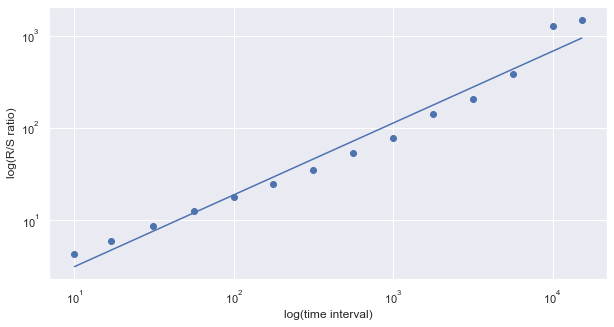

In [77]:
from hurst import compute_Hc, random_walk
import seaborn as sns
sns.set();
%matplotlib inline

np.random.seed(42)
random_changes = 1. + np.random.randn(16000) / 1000.
#DATA.close = np.cumprod(random_changes)  
H, c, result = compute_Hc(DATA.close, kind='price', simplified=True)


plt.rcParams['figure.figsize'] = 10, 5
f, ax = plt.subplots()
_ = ax.plot(result[0], c*result[0]**H)
_ = ax.scatter(result[0], result[1])
_ = ax.set_xscale('log')
_ = ax.set_yscale('log')
_ = ax.set_xlabel('log(time interval)')
_ = ax.set_ylabel('log(R/S ratio)')

print("H={:.3f}, c={:.3f}".format(H,c))

H=-0.698, c=10766.056


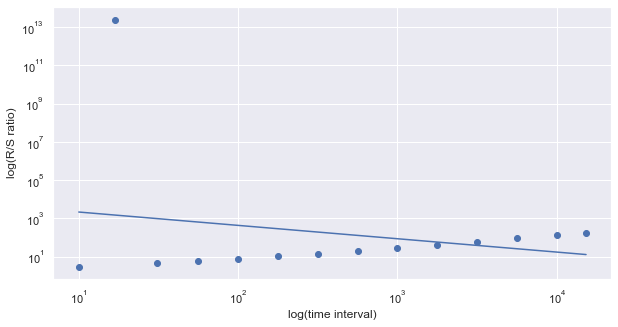

In [83]:
#DATA.open = np.cumprod(random_changes)  
DATA['VZO'] += (abs(DATA['VZO'].min())*2)
H, c, result = compute_Hc(DATA.VZO, kind='price', simplified=True)

plt.rcParams['figure.figsize'] = 10, 5
f, ax = plt.subplots()
_ = ax.plot(result[0], c*result[0]**H)
_ = ax.scatter(result[0], result[1])
_ = ax.set_xscale('log')
_ = ax.set_yscale('log')
_ = ax.set_xlabel('log(time interval)')
_ = ax.set_ylabel('log(R/S ratio)')

print("H={:.3f}, c={:.3f}".format(H,c))

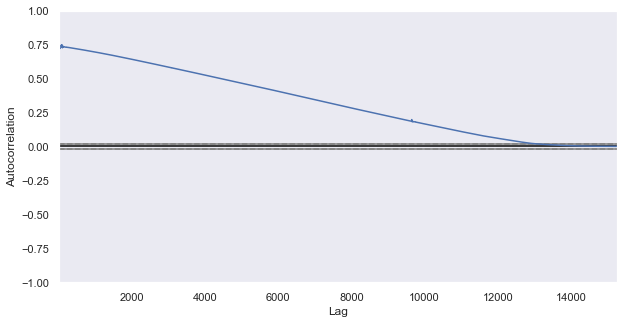

In [84]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
autocorrelation_plot(DATA)
pyplot.show()

In [85]:
pip install PyRQA


The following command must be run outside of the IPython shell:

    $ pip install PyRQA

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [86]:
from pyrqa.time_series import TimeSeries
from pyrqa.settings import Settings
#from pyrqa.computing_type import ComputingType
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation

time_series = TimeSeries(DATA.close,
                         embedding_dimension=2,
                         time_delay=2)
settings = Settings(time_series,
                    #computing_type=ComputingType.Classic,
                    neighbourhood=FixedRadius(0.65),
                    similarity_measure=EuclideanMetric,
                    theiler_corrector=1)
computation = RQAComputation.create(settings,
                                    verbose=True)
result = computation.run()
result.min_diagonal_line_length = 2
result.min_vertical_line_length = 2
result.min_white_vertical_line_lelngth = 2
print(result)

[Platform 'Apple']
Vendor: Apple
Version: OpenCL 1.2 (Jan  2 2020 17:35:29)
Profile: FULL_PROFILE
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE_query_kernel_names cl_APPLE_gl_sharing cl_khr_gl_event


[Device 'Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz']
Vendor: Intel
Type: 2
Version: OpenCL 1.2 
Profile: FULL_PROFILE
Max Clock Frequency: 2300
Global Mem Size: 8589934592
Address Bits: 64
Max Compute Units: 4
Max Work Group Size: 1024
Max Work Item Dimensions: 3
Max Work Item Sizes: [1024, 1, 1]
Local Mem Size: 32768
Max Mem Alloc Size: 2147483648
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE_query_kernel_names cl_APPLE_gl_sharing cl_khr_gl_event cl_khr_fp64 cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_byte_addressable_store cl_khr_int64_base_atomics cl_khr_int64_extended_atomics cl_k

In [88]:
time_series = TimeSeries(DATA.VZO,
                         embedding_dimension=2,
                         time_delay=2)
settings = Settings(time_series,
                    #computing_type=ComputingType.Classic,
                    neighbourhood=FixedRadius(0.65),
                    similarity_measure=EuclideanMetric,
                    theiler_corrector=1)
computation = RQAComputation.create(settings,
                                    verbose=True)
result = computation.run()
result.min_diagonal_line_length = 2
result.min_vertical_line_length = 2
result.min_white_vertical_line_lelngth = 2
print(result)

[Platform 'Apple']
Vendor: Apple
Version: OpenCL 1.2 (Jan  2 2020 17:35:29)
Profile: FULL_PROFILE
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE_query_kernel_names cl_APPLE_gl_sharing cl_khr_gl_event


[Device 'Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz']
Vendor: Intel
Type: 2
Version: OpenCL 1.2 
Profile: FULL_PROFILE
Max Clock Frequency: 2300
Global Mem Size: 8589934592
Address Bits: 64
Max Compute Units: 4
Max Work Group Size: 1024
Max Work Item Dimensions: 3
Max Work Item Sizes: [1024, 1, 1]
Local Mem Size: 32768
Max Mem Alloc Size: 2147483648
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE_query_kernel_names cl_APPLE_gl_sharing cl_khr_gl_event cl_khr_fp64 cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_byte_addressable_store cl_khr_int64_base_atomics cl_khr_int64_extended_atomics cl_k

In [83]:
time_series = TimeSeries(DATA.cum_vol,
                         embedding_dimension=2,
                         time_delay=2)
settings = Settings(time_series,
                    #computing_type=ComputingType.Classic,
                    neighbourhood=FixedRadius(0.65),
                    similarity_measure=EuclideanMetric,
                    theiler_corrector=1)
computation = RQAComputation.create(settings,
                                    verbose=True)
result = computation.run()
result.min_diagonal_line_length = 2
result.min_vertical_line_length = 2
result.min_white_vertical_line_lelngth = 2
print(result)

[Platform 'Apple']
Vendor: Apple
Version: OpenCL 1.2 (Jan  2 2020 17:35:29)
Profile: FULL_PROFILE
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE_query_kernel_names cl_APPLE_gl_sharing cl_khr_gl_event


[Device 'Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz']
Vendor: Intel
Type: 2
Version: OpenCL 1.2 
Profile: FULL_PROFILE
Max Clock Frequency: 2300
Global Mem Size: 8589934592
Address Bits: 64
Max Compute Units: 4
Max Work Group Size: 1024
Max Work Item Dimensions: 3
Max Work Item Sizes: [1024, 1, 1]
Local Mem Size: 32768
Max Mem Alloc Size: 2147483648
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE_query_kernel_names cl_APPLE_gl_sharing cl_khr_gl_event cl_khr_fp64 cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_byte_addressable_store cl_khr_int64_base_atomics cl_khr_int64_extended_atomics cl_k

In [84]:
time_series = TimeSeries(DATA.cum_dollar,
                         embedding_dimension=2,
                         time_delay=2)
settings = Settings(time_series,
                    #computing_type=ComputingType.Classic,
                    neighbourhood=FixedRadius(0.65),
                    similarity_measure=EuclideanMetric,
                    theiler_corrector=1)
computation = RQAComputation.create(settings,
                                    verbose=True)
result = computation.run()
result.min_diagonal_line_length = 2
result.min_vertical_line_length = 2
result.min_white_vertical_line_lelngth = 2
print(result)

[Platform 'Apple']
Vendor: Apple
Version: OpenCL 1.2 (Jan  2 2020 17:35:29)
Profile: FULL_PROFILE
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE_query_kernel_names cl_APPLE_gl_sharing cl_khr_gl_event


[Device 'Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz']
Vendor: Intel
Type: 2
Version: OpenCL 1.2 
Profile: FULL_PROFILE
Max Clock Frequency: 2300
Global Mem Size: 8589934592
Address Bits: 64
Max Compute Units: 4
Max Work Group Size: 1024
Max Work Item Dimensions: 3
Max Work Item Sizes: [1024, 1, 1]
Local Mem Size: 32768
Max Mem Alloc Size: 2147483648
Extensions: cl_APPLE_SetMemObjectDestructor cl_APPLE_ContextLoggingFunctions cl_APPLE_clut cl_APPLE_query_kernel_names cl_APPLE_gl_sharing cl_khr_gl_event cl_khr_fp64 cl_khr_global_int32_base_atomics cl_khr_global_int32_extended_atomics cl_khr_local_int32_base_atomics cl_khr_local_int32_extended_atomics cl_khr_byte_addressable_store cl_khr_int64_base_atomics cl_khr_int64_extended_atomics cl_k

In [85]:
!pip install pyunicorn


In [86]:
pip install -U pip setuptools


The following command must be run outside of the IPython shell:

    $ pip install -U pip setuptools

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [87]:
pip install pyts


The following command must be run outside of the IPython shell:

    $ pip install pyts

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [88]:
DATA_diff = DATA-DATA.shift().fillna(0) # differencing
DATA_log = np.log(DATA).diff().fillna(0) # log transform


## Testing Causation using Granger’s Causality Test

In [89]:
from statsmodels.tsa.stattools import grangercausalitytests

In [90]:
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(X, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    DATA = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in DATA.columns:
        for r in DATA.index:
            test_result = grangercausalitytests(X[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            DATA.loc[r, c] = min_p_value
    DATA.columns = [var + '_x' for var in variables]
    DATA.index = [var + '_y' for var in variables]
    return DATA

In [91]:
grangers_causation_matrix(DATA, variables = DATA.columns)    

/Users/yiluntong/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
/Users/yiluntong/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)


,open_x,high_x,low_x,close_x,cum_vol_x,cum_dollar_x,cum_ticks_x,AO_x,EMA_x,DEMA_x,...,CHAIKIN_x,MFI_x,VZO_x,PZO_x,EFI_x,CFI_x,CMO_x,FISH_x,VPT_x,MSD_x
open_y,1.0000,0.0000,0.0000,0.0000,0.0000,0.6051,0.0000,0.0000,0.0000,0.0000,...,0.0006,0.5700,0.1905,0.0000,0.0000,0.0000,0.0000,0.0000,0.0146,0.0000
high_y,0.0000,1.0000,0.0000,0.0000,0.5464,0.0006,0.0000,0.0000,0.0000,0.0000,...,0.0005,0.5752,0.1606,0.0000,0.0000,0.0000,0.0000,0.0000,0.0124,0.0000
low_y,0.0000,0.0000,1.0000,0.0000,0.0000,0.0006,0.0000,0.0000,0.0000,0.0000,...,0.0146,0.8562,0.1860,0.0000,0.0440,0.0062,0.0000,0.0000,0.0075,0.0000
close_y,0.1194,0.0231,0.0138,1.0000,0.7363,0.6188,0.1157,0.0078,0.0003,0.0363,...,0.0088,0.2907,0.1246,0.0521,0.0000,0.0000,0.0072,0.0139,0.0147,0.0000
cum_vol_y,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.1636,0.9855,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0460
cum_dollar_y,0.8163,0.5374,0.8986,0.8819,0.1939,1.0000,0.0001,0.1391,0.8898,0.9126,...,0.0000,0.9392,0.9574,0.0202,0.0000,0.0000,0.1946,0.0899,0.0000,0.0136
cum_ticks_y,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,...,0.0000,0.0969,0.1166,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
AO_y,0.0000,0.0000,0.0000,0.0000,0.0000,0.4296,0.0000,1.0000,0.0000,0.0000,...,0.0150,0.3139,0.0183,0.0000,0.0000,0.0000,0.0000,0.0000,0.6013,0.0000
EMA_y,0.0000,0.0000,0.0000,0.0000,0.0003,0.5382,0.0000,0.0000,1.0000,0.0000,...,0.0000,0.4525,0.0181,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000
DEMA_y,0.0000,0.0000,0.0000,0.0000,0.2141,0.5966,0.0000,0.0000,0.0000,1.0000,...,0.0004,0.4630,0.0099,0.0000,0.0000,0.0000,0.0000,0.0000,0.0024,0.0000


## Cointegration Test
Cointegration test helps to establish the presence of a statistically significant connection between the time series.
When the time series are cointegrated, it means they have a long run, statistically significant relationship which is  the basic premise on which Vector Autoregression(VAR) models is based on. 

In [92]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(DATA, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(DATA,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 4): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(DATA.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)
DATA = DATA.astype(float) 
#cointegration_test(DATA)

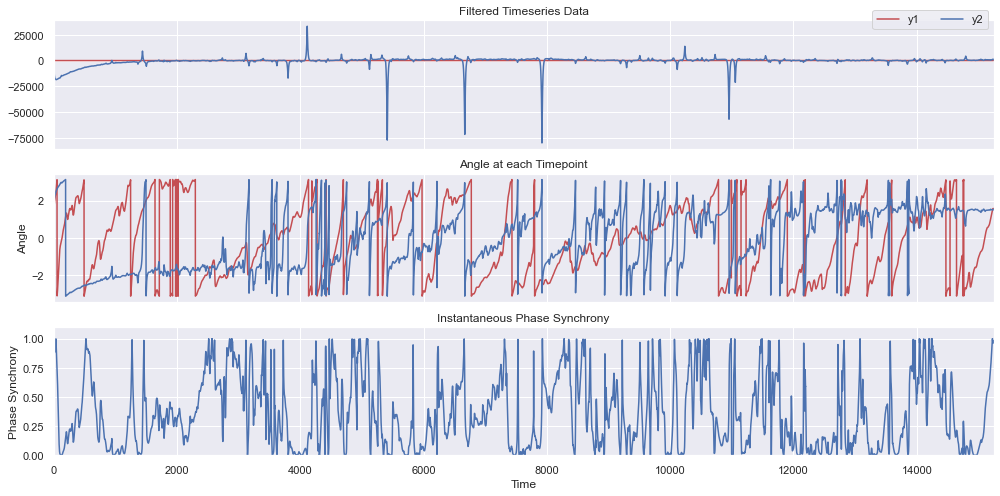

In [94]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(DATA, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, DATA)
    return y

lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = DATA.close.interpolate().values
d2 = DATA.VZO.interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()


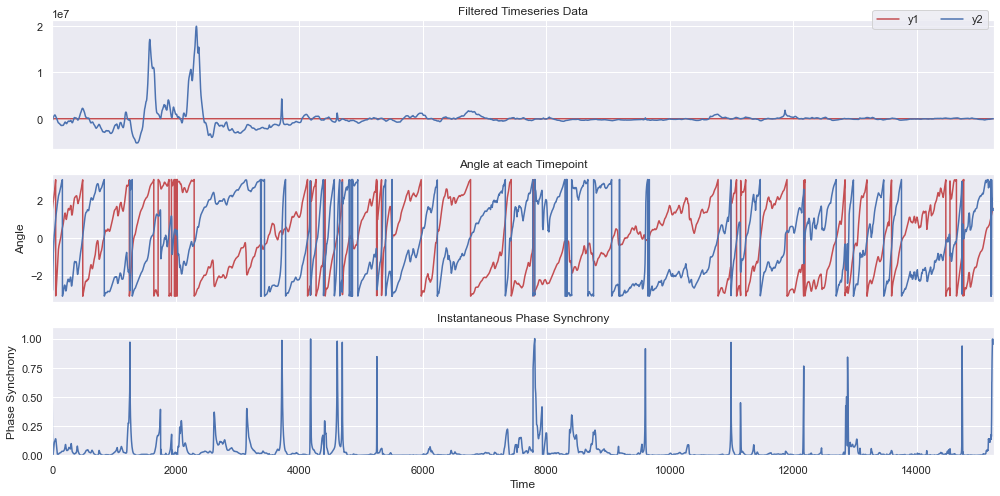

In [95]:
d1 = DATA.close.interpolate().values
d2 = DATA.cum_vol.interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

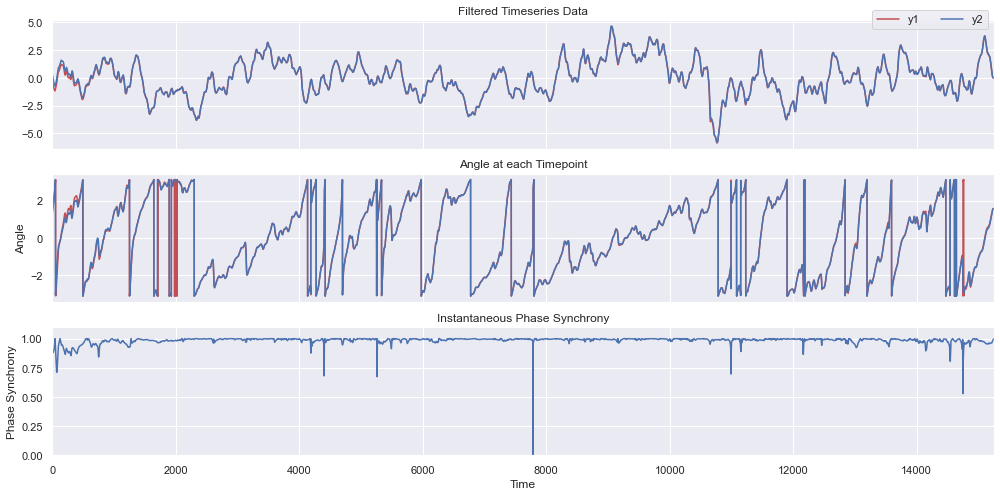

In [96]:
d1 = DATA.close.interpolate().values
d2 = DATA.high.interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

## VAR model

In [97]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
#DATA_log = np.log(DATA).diff().dropna()
# make a VAR model



model = VAR(DATA)

DATA_diff.head()

/Users/yiluntong/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,open,high,low,close,cum_vol,cum_dollar,cum_ticks,AO,EMA,DEMA,...,CHAIKIN,MFI,VZO,PZO,EFI,CFI,CMO,FISH,VPT,MSD
date_time,,,,,,,,,,,,,,,,,,,,,
2010-01-19 14:58:59.093,9.08,9.10,8.84,9.04,7737601.0,70000162.62,17369.0,-0.227647,9.006818,9.020411,...,-106254.973882,9.764891,19728.893438,12.313258,-8032.734692,-269876.828559,-6.422018,-0.104943,-1.881716e+06,0.173613
2010-01-20 09:46:50.846,-0.04,0.03,0.06,-0.12,33938.0,58259.73,-1767.0,0.035235,-0.017369,-0.033983,...,-19877.749279,-88.869110,-20136.225129,-14.933773,-749.157562,-8622.101961,4.498941,-0.032030,-1.152438e+05,-0.007966
2010-01-20 11:07:25.531,-0.12,-0.17,-0.14,-0.15,110442.0,-55274.29,2175.0,0.017618,-0.043901,-0.078416,...,-14282.751707,127.927805,118.243140,-12.763597,-8.498449,-8661.957923,-26.378810,-0.342768,-8.841150e+04,-0.001190
2010-01-20 15:08:51.352,-0.15,0.05,0.00,0.03,58941.0,-3026.69,1832.0,0.021647,-0.029116,-0.044898,...,28774.977908,-128.078895,-712.078784,15.202791,890.781416,-7554.707170,18.411777,-0.352081,-2.060568e+04,0.000000
2010-01-21 09:45:13.953,0.03,0.09,0.01,0.15,-85857.0,-53.10,-4136.0,-0.014735,0.006715,0.022752,...,22370.356290,51.186939,-158.858243,13.415698,1021.592195,-6320.321844,-1.221001,-0.136529,-4.660000e+03,-0.002830


### Lag order selection
Choice of lag order can be a difficult problem. Standard analysis employs likelihood test or information criteria-based order selection. We have implemented the latter, accessible through the VAR class.

In [98]:
#model.select_order(2)

In [99]:
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  107.86510399907445
BIC :  108.42680368397258
FPE :  7.001958988465522e+46
HQIC:  108.0513201717216 

Lag Order = 2
AIC :  103.24481827804183
BIC :  104.35176016535935
FPE :  6.896927718176577e+44
HQIC:  103.61179577363697 

Lag Order = 3
AIC :  99.08311241872171
BIC :  100.73535867463355
FPE :  1.0746119630917672e+43
HQIC:  99.63087300813437 

Lag Order = 4
AIC :  99.95841650035777
BIC :  102.15602930235214
FPE :  2.578665763049033e+43
HQIC:  100.6869819585311 

Lag Order = 5
AIC :  99.04668476882404
BIC :  101.78972630570526
FPE :  1.0361938057216705e+43
HQIC:  99.9560768747758 

Lag Order = 6
AIC :  94.8450943324671
BIC :  98.13362680435839
FPE :  1.5513949681602897e+41
HQIC:  95.9353348692907 

Lag Order = 7
AIC :  95.61549717016807
BIC :  99.44958278851436
FPE :  3.3520965838426633e+41
HQIC:  96.8866079250336 

Lag Order = 8
AIC :  92.87110748034688
BIC :  97.25080846791764
FPE :  2.1550619991576905e+40
HQIC:  94.32311024450215 

Lag Order = 9
AIC :  92.7769600

In [100]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,249.6,249.6,2.569e+108,249.6
1,108.9,109.5,1.961e+47,109.1
2,103.3,104.4,7.388e+44,103.7
3,100.7,102.4,5.414e+43,101.2
4,99.70,101.9,1.985e+43,100.4
5,99.12,101.9,1.116e+43,100.0
6,94.48,97.77,1.078e+41,95.57
7,96.38,100.2,7.187e+41,97.65
8,92.97,97.35,2.384e+40,94.42
9,92.85,97.77,2.104e+40,94.48


In [103]:
A = model.fit(maxlags=8, ic='hqic') # pass a maximum number of lags and the order criterion to use for order selection
#A.summary()

In [105]:
R1=A.test_causality('close', ['VZO', 'FISH', 'EFI'], kind='f')
print(R1)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: %s do not Granger-cause close: reject at 5% significance level. Test statistic: 5.289, critical value: 1.517>, p-value: 0.000>


In [106]:
R2=A.test_causality('close', ['MSD', 'CFI', 'CMO'], kind='f')
print(R2)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: %s do not Granger-cause close: fail to reject at 5% significance level. Test statistic: -4.002, critical value: 1.517>, p-value: 1.000>


In [119]:
granger_test_result = grangercausalitytests(DATA_diff[['close', 'MFI']].values,maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4695  , p=0.2254  , df_denom=15242, df_num=1
ssr based chi2 test:   chi2=1.4698  , p=0.2254  , df=1
likelihood ratio test: chi2=1.4697  , p=0.2254  , df=1
parameter F test:         F=1.4695  , p=0.2254  , df_denom=15242, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9711  , p=0.3787  , df_denom=15239, df_num=2
ssr based chi2 test:   chi2=1.9429  , p=0.3785  , df=2
likelihood ratio test: chi2=1.9427  , p=0.3786  , df=2
parameter F test:         F=0.9711  , p=0.3787  , df_denom=15239, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6660  , p=0.5728  , df_denom=15236, df_num=3
ssr based chi2 test:   chi2=1.9989  , p=0.5726  , df=3
likelihood ratio test: chi2=1.9988  , p=0.5727  , df=3
parameter F test:         F=0.6660  , p=0.5728  , df_denom=15236, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5132  

In [104]:
granger_test_result = grangercausalitytests(DATA_diff[['close', 'high']].values,maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.0794  , p=0.0242  , df_denom=15293, df_num=1
ssr based chi2 test:   chi2=5.0804  , p=0.0242  , df=1
likelihood ratio test: chi2=5.0796  , p=0.0242  , df=1
parameter F test:         F=5.0794  , p=0.0242  , df_denom=15293, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0079  , p=0.1343  , df_denom=15290, df_num=2
ssr based chi2 test:   chi2=4.0171  , p=0.1342  , df=2
likelihood ratio test: chi2=4.0166  , p=0.1342  , df=2
parameter F test:         F=2.0079  , p=0.1343  , df_denom=15290, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1127  , p=0.3424  , df_denom=15287, df_num=3
ssr based chi2 test:   chi2=3.3396  , p=0.3422  , df=3
likelihood ratio test: chi2=3.3393  , p=0.3422  , df=3
parameter F test:         F=1.1127  , p=0.3424  , df_denom=15287, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0521  

In [105]:
granger_test_result = grangercausalitytests(DATA_diff[['close', 'cum_vol']].values,maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0083  , p=0.9272  , df_denom=15293, df_num=1
ssr based chi2 test:   chi2=0.0083  , p=0.9272  , df=1
likelihood ratio test: chi2=0.0083  , p=0.9272  , df=1
parameter F test:         F=0.0083  , p=0.9272  , df_denom=15293, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3335  , p=0.7164  , df_denom=15290, df_num=2
ssr based chi2 test:   chi2=0.6673  , p=0.7163  , df=2
likelihood ratio test: chi2=0.6673  , p=0.7163  , df=2
parameter F test:         F=0.3335  , p=0.7164  , df_denom=15290, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1915  , p=0.9022  , df_denom=15287, df_num=3
ssr based chi2 test:   chi2=0.5748  , p=0.9022  , df=3
likelihood ratio test: chi2=0.5748  , p=0.9022  , df=3
parameter F test:         F=0.1915  , p=0.9022  , df_denom=15287, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5947  

In [106]:
granger_test_result = grangercausalitytests(DATA_diff[['cum_vol', 'cum_dollar']].values,maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=20.4407 , p=0.0000  , df_denom=15293, df_num=1
ssr based chi2 test:   chi2=20.4447 , p=0.0000  , df=1
likelihood ratio test: chi2=20.4311 , p=0.0000  , df=1
parameter F test:         F=20.4407 , p=0.0000  , df_denom=15293, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=103.5248, p=0.0000  , df_denom=15290, df_num=2
ssr based chi2 test:   chi2=207.1173, p=0.0000  , df=2
likelihood ratio test: chi2=205.7275, p=0.0000  , df=2
parameter F test:         F=103.5248, p=0.0000  , df_denom=15290, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=57.4063 , p=0.0000  , df_denom=15287, df_num=3
ssr based chi2 test:   chi2=172.2977, p=0.0000  , df=3
likelihood ratio test: chi2=171.3344, p=0.0000  , df=3
parameter F test:         F=57.4063 , p=0.0000  , df_denom=15287, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=73.4740 

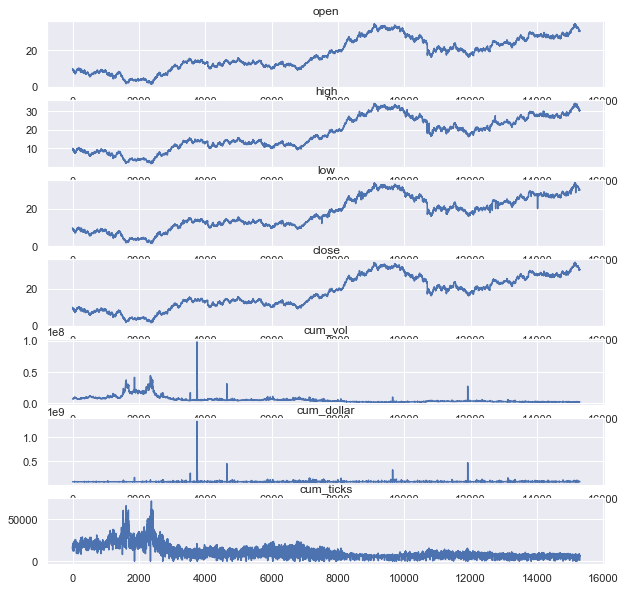

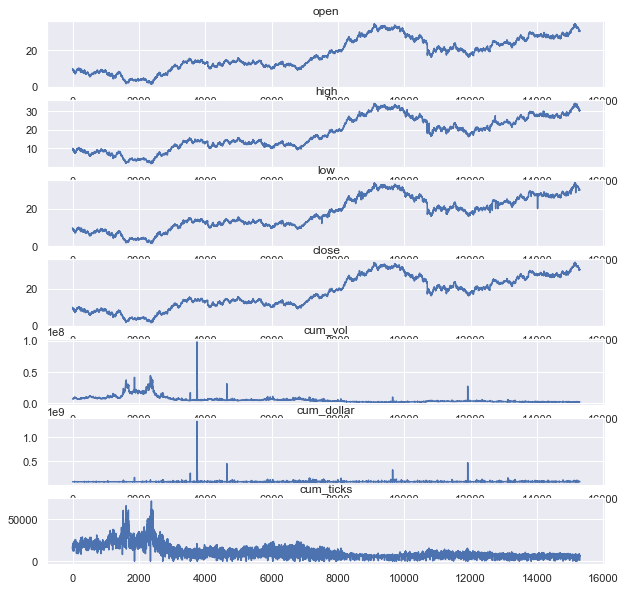

In [107]:
A.plot()

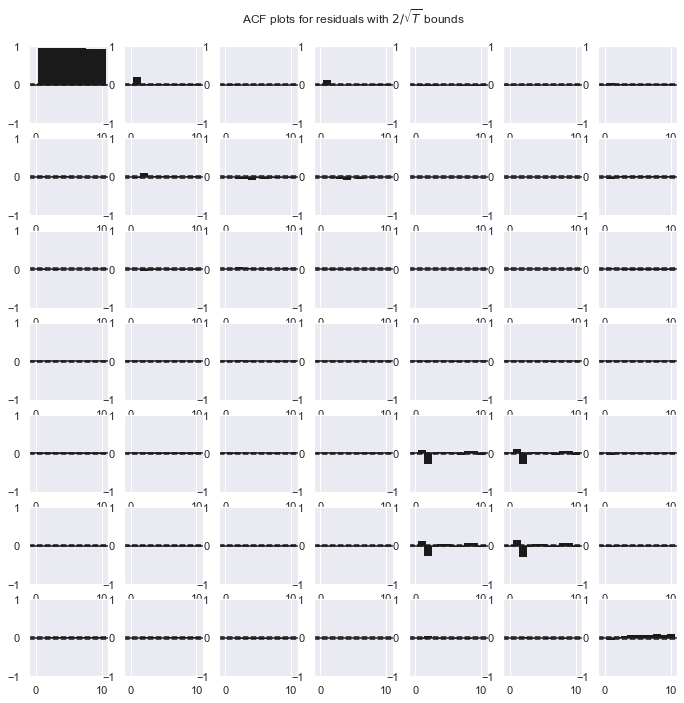

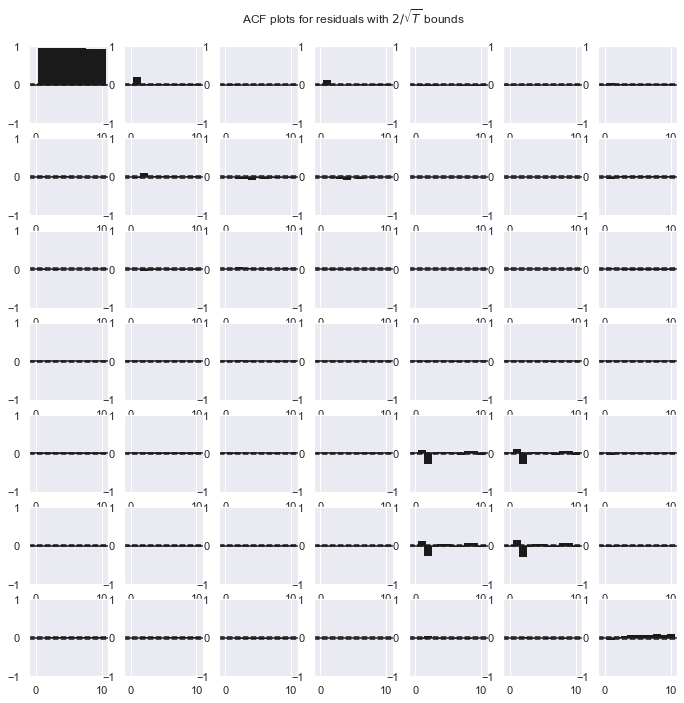

In [108]:
A.plot_acorr()

In [109]:
irf = A.irf(4)

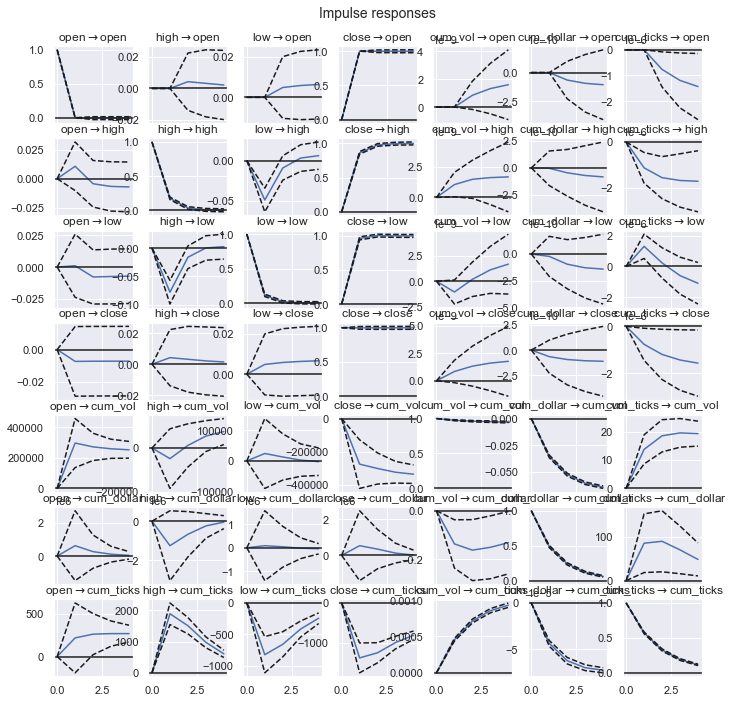

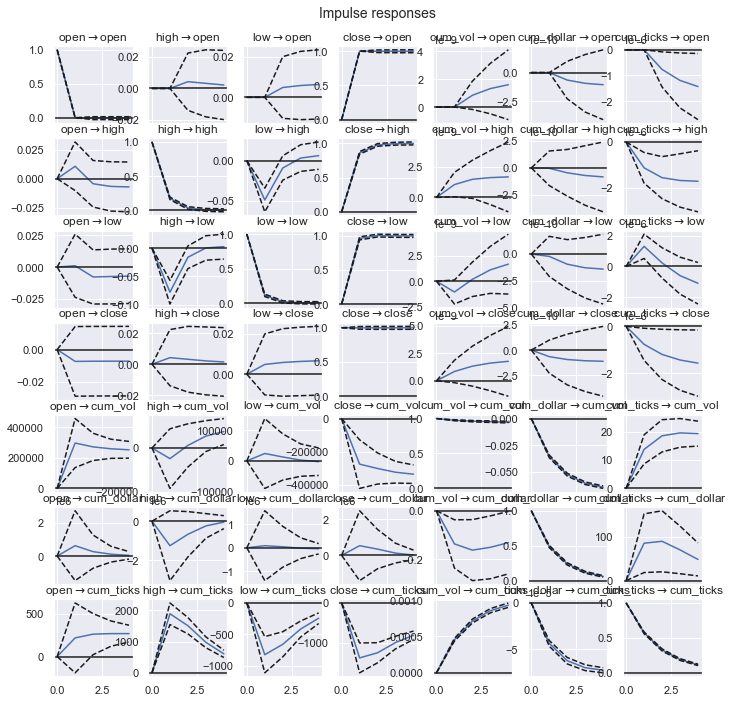

In [110]:
irf.plot(orth=False)


In [111]:
fevd = A.fevd(4)

In [112]:
fevd.summary()

FEVD for open
         open      high       low     close   cum_vol  cum_dollar  cum_ticks
0    1.000000  0.000000  0.000000  0.000000  0.000000    0.000000   0.000000
1    0.000000  0.200303  0.148758  0.650939  0.000000    0.000000   0.000000
2    0.000000  0.201780  0.149985  0.648129  0.000001    0.000001   0.000104
3    0.000000  0.202102  0.150562  0.647094  0.000003    0.000002   0.000238

FEVD for high
         open      high       low     close   cum_vol  cum_dollar  cum_ticks
0    0.000000  1.000000  0.000000  0.000000  0.000000    0.000000   0.000000
1    0.000000  0.692129  0.041641  0.265938  0.000044    0.000000   0.000247
2    0.000000  0.529926  0.074673  0.394879  0.000057    0.000000   0.000465
3    0.000000  0.444746  0.094202  0.460389  0.000058    0.000000   0.000604

FEVD for low
         open      high       low     close   cum_vol  cum_dollar  cum_ticks
0    0.000000  0.000149  0.999851  0.000000  0.000000    0.000000   0.000000
1    0.000000  0.054355  0.685223

In [114]:
from statsmodels.tsa.seasonal import seasonal_decompose

/Users/yiluntong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


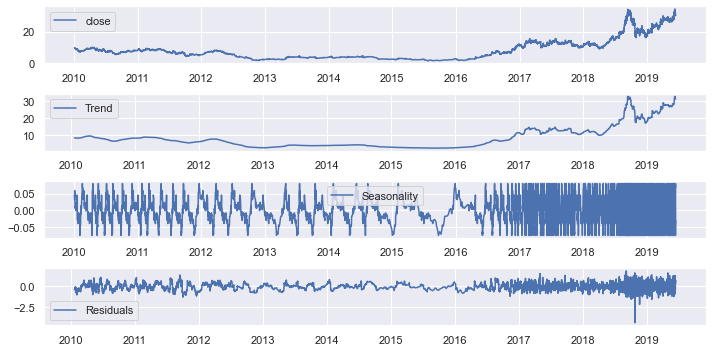

In [116]:
decomposition = seasonal_decompose(DATA.close, freq = 100)
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid

plt.subplot(411) 
plt.plot(DATA.close, label = 'close') 
plt.legend(loc = 'best') 
plt.subplot(412) 
plt.plot(trend, label = 'Trend') 
plt.legend(loc = 'best') 
plt.subplot(413) 
plt.plot(seasonal, label = 'Seasonality') 
plt.legend(loc = 'best') 
plt.subplot(414) 
plt.plot(residual, label = 'Residuals') 
plt.legend(loc = 'best') 
plt.tight_layout()

/Users/yiluntong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


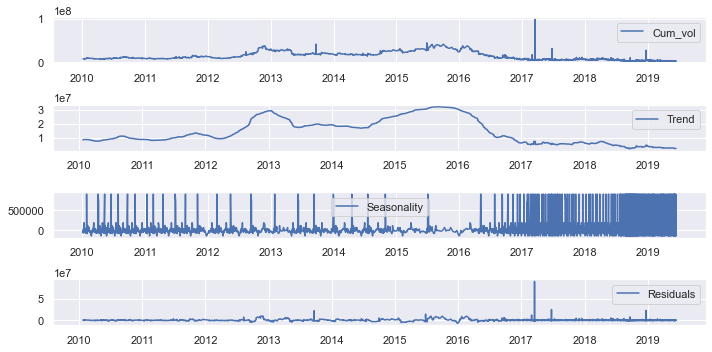

In [117]:
decomposition = seasonal_decompose(DATA.cum_vol, freq = 100)
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid

plt.subplot(411) 
plt.plot(DATA.cum_vol, label = 'Cum_vol') 
plt.legend(loc = 'best') 
plt.subplot(412) 
plt.plot(trend, label = 'Trend') 
plt.legend(loc = 'best') 
plt.subplot(413) 
plt.plot(seasonal, label = 'Seasonality') 
plt.legend(loc = 'best') 
plt.subplot(414) 
plt.plot(residual, label = 'Residuals') 
plt.legend(loc = 'best') 
plt.tight_layout()


In [ ]:
pip install TA-lib

In [ ]:
pip install h2o

In [ ]:
import h2o

In [ ]:
h2o.init()